Learning rate: 0.05, Epochs to converge: 2087
Learning rate: 0.10, Epochs to converge: 5000
Learning rate: 0.15, Epochs to converge: 726
Learning rate: 0.20, Epochs to converge: 5000
Learning rate: 0.25, Epochs to converge: 5000
Learning rate: 0.30, Epochs to converge: 5000
Learning rate: 0.35, Epochs to converge: 5000
Learning rate: 0.40, Epochs to converge: 5000
Learning rate: 0.45, Epochs to converge: 5000
Learning rate: 0.50, Epochs to converge: 2178


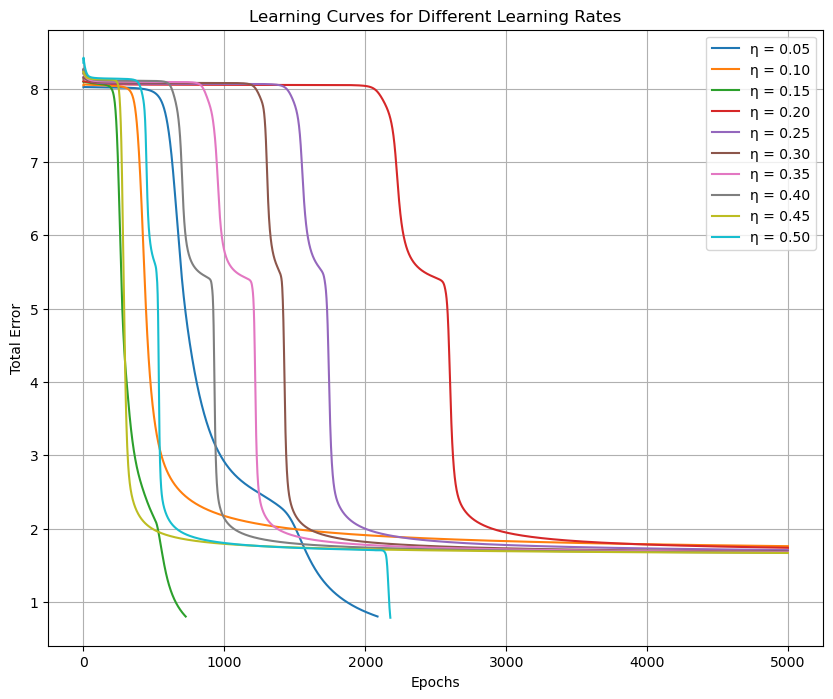

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# Initialize parameters
input_size = 4
hidden_size = 4
output_size = 1
epochs = 5000
error_threshold = 0.05
momentum_term = 0.9
learning_rate_increments = np.arange(0.05, 0.51, 0.05)

# Pattern generation
patterns = np.array([[int(x) for x in format(i, '04b')] for i in range(16)])
desired_output = np.array([np.sum(pattern) % 2 for pattern in patterns]).reshape(-1, 1)

# Training function
def train_network(learning_rate, momentum):
    # Weight initialization
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
    bias_output = np.random.uniform(-1, 1, (1, output_size))

    epoch_count = 0
    learning_curve = []

    # Momentum terms
    delta_w_i_h_prev = np.zeros_like(weights_input_hidden)
    delta_w_h_o_prev = np.zeros_like(weights_hidden_output)
    delta_b_h_prev = np.zeros_like(bias_hidden)
    delta_b_o_prev = np.zeros_like(bias_output)

    for epoch in range(epochs):
        total_error = 0

        for x, d in zip(patterns, desired_output):
            # Forward pass
            input_hidden = np.dot(x, weights_input_hidden) + bias_hidden
            output_hidden = sigmoid(input_hidden)
            input_final = np.dot(output_hidden, weights_hidden_output) + bias_output
            output_final = sigmoid(input_final)

            # Compute error
            error = d - output_final
            total_error += np.abs(error).sum()

            # Backpropagation
            delta_output = error * sigmoid_derivative(output_final)
            error_hidden = np.dot(delta_output, weights_hidden_output.T)
            delta_hidden = error_hidden * sigmoid_derivative(output_hidden)

            # Weight updates with momentum
            delta_w_h_o = learning_rate * np.dot(output_hidden.T, delta_output) + momentum * delta_w_h_o_prev
            delta_w_i_h = learning_rate * np.dot(x.reshape(-1, 1), delta_hidden) + momentum * delta_w_i_h_prev
            delta_b_o = learning_rate * delta_output + momentum * delta_b_o_prev
            delta_b_h = learning_rate * delta_hidden + momentum * delta_b_h_prev

            weights_hidden_output += delta_w_h_o
            weights_input_hidden += delta_w_i_h
            bias_output += delta_b_o.sum(axis=0)
            bias_hidden += delta_b_h.sum(axis=0)

            # Update momentum terms
            delta_w_h_o_prev = delta_w_h_o
            delta_w_i_h_prev = delta_w_i_h
            delta_b_o_prev = delta_b_o
            delta_b_h_prev = delta_b_h

        learning_curve.append(total_error)

        # Check if the solution meets the error criteria
        if total_error < error_threshold * len(patterns):
            break

        epoch_count += 1

    return epoch_count, learning_curve

# Run training and plot results
plt.figure(figsize=(10, 8))

for eta in learning_rate_increments:
    epochs_needed, learning_curve = train_network(eta, momentum_term)
    plt.plot(learning_curve, label=f'η = {eta:.2f}')
    print(f"Learning rate: {eta:.2f}, Epochs to converge: {epochs_needed}")

plt.title('Learning Curves for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)
plt.show()